In [1]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


C:\Users\becky\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


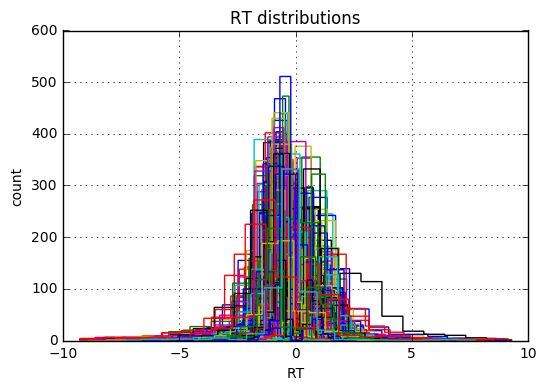

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (fearful) and facial expression (fearful)
ff1_data = data1.loc[(data1['emotionRating'] == 'fearful') & (data1['expression'] == 'fearful')]
ff1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
113,gc2le9xecjp1stz,1,4,fearful,116,_faces/71_M_F_X.jpg,71_M_F_X,71,M,fearful,baseline,1,1.198005,0,0,100,0,0,0
120,gc2le9xecjp1stz,1,4,fearful,123,_faces/33_M_F_L.jpg,33_M_F_L,33,M,fearful,lower,0,-1.027245,0,0,50,0,0,0
121,gc2le9xecjp1stz,1,4,fearful,124,_faces/33_M_F_X.jpg,33_M_F_X,33,M,fearful,baseline,0,-0.981540,0,0,100,0,0,0
124,gc2le9xecjp1stz,1,4,fearful,127,_faces/31_F_F_U.jpg,31_F_F_U,31,F,fearful,upper,0,-0.877285,0,0,50,0,0,0
130,gc2le9xecjp1stz,1,4,fearful,133,_faces/14_F_F_L.jpg,14_F_F_L,14,F,fearful,lower,0,-1.261640,0,0,50,0,0,0
132,gc2le9xecjp1stz,1,4,fearful,135,_faces/31_F_F_L.jpg,31_F_F_L,31,F,fearful,lower,0,-0.848280,0,0,50,0,0,0
134,gc2le9xecjp1stz,1,4,fearful,137,_faces/20_M_F_X.jpg,20_M_F_X,20,M,fearful,baseline,0,-1.143630,0,0,100,0,0,0
145,gc2le9xecjp1stz,1,4,fearful,148,_faces/14_F_F_X.jpg,14_F_F_X,14,F,fearful,baseline,1,0.980660,0,0,100,0,0,0
146,gc2le9xecjp1stz,1,4,fearful,149,_faces/33_M_F_U.jpg,33_M_F_U,33,M,fearful,upper,1,1.322030,0,0,50,0,0,0
148,gc2le9xecjp1stz,1,4,fearful,151,_faces/20_M_F_U.jpg,20_M_F_U,20,M,fearful,upper,0,-7.975950,0,0,50,0,0,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ff1_data = ff1_data[(ff1_data.subj_idx != '7chb1ucy8l7g29z') & (ff1_data.subj_idx != 'ygpcur698h4dcw5')]

In [6]:
# define model
m_ff1 = hddm.HDDMRegressor(ff1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 30936.0 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std         2.5q        25q         50q        75q      97.5q       mc err
a                                    1.72977   0.0384987      1.65519    1.70418     1.72913    1.75503      1.808  0.000593157
a_std                               0.521662   0.0327367     0.461195    0.49918    0.520669   0.542784   0.588629  0.000682738
a_subj.02hcv424u29nd5w               2.32235    0.335043      1.75669     2.0858     2.28461    2.52472     3.0642   0.00635006
a_subj.02k2uwlhgxnumn9               1.73928     0.23314      1.34769    1.57113      1.7177    1.87935    2.25825   0.00372499
a_subj.03g7h2hzq4o3g26               2.56917    0.256609       2.1168    2.38824     2.55157    2.72583    3.13152   0.00403409
a_subj.0nmr75cysk1ae0e               2.25322    0.256003      1.79904    2.07621     2.23452    2.41319    2.80082   0.00367702
a_subj.0t8qp67pqkw36cb                1.7293    0.187497      1.40136    1.59907     1.71244    1.84494 

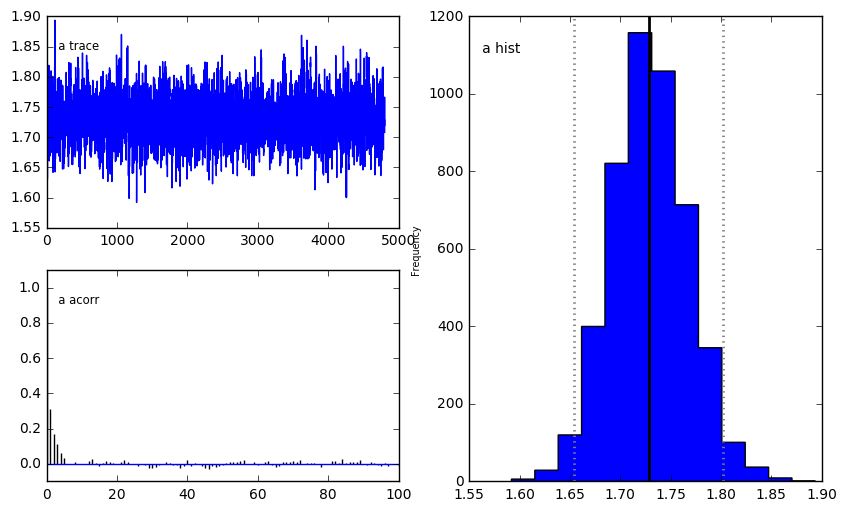

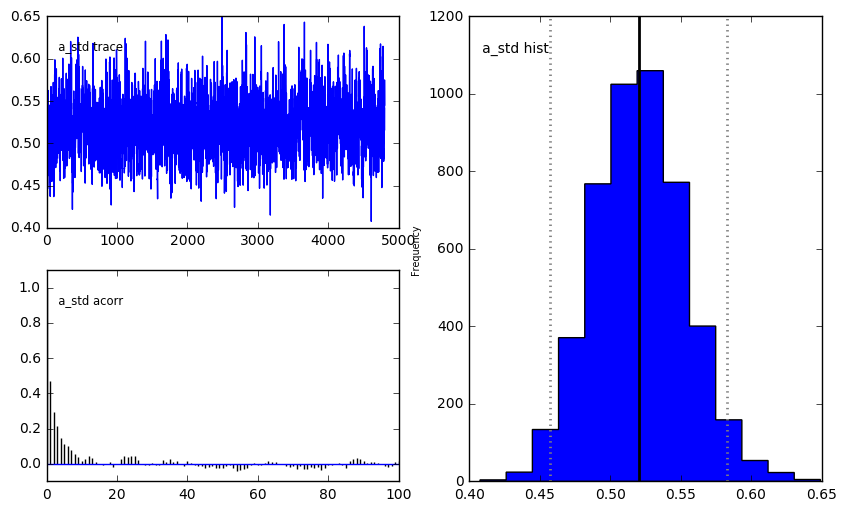

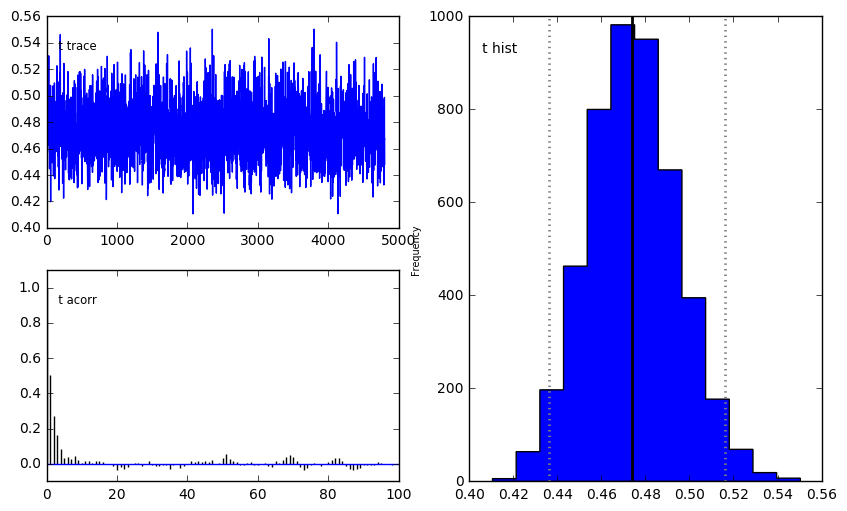

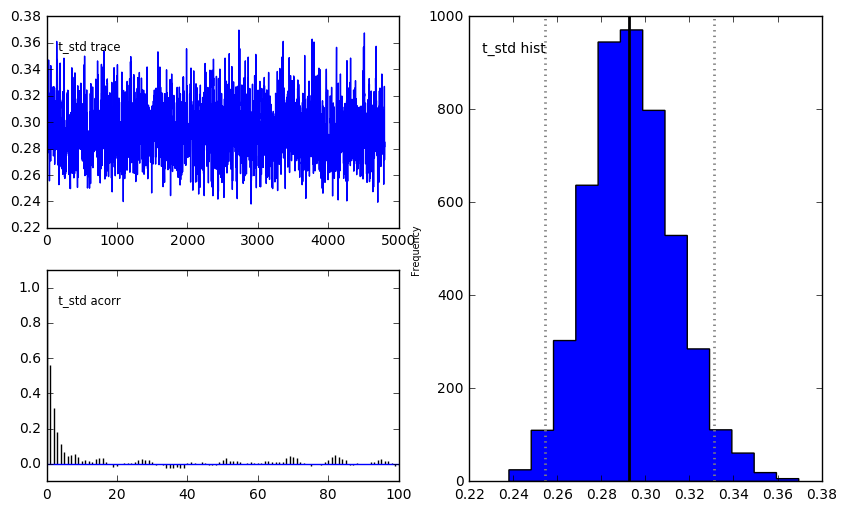

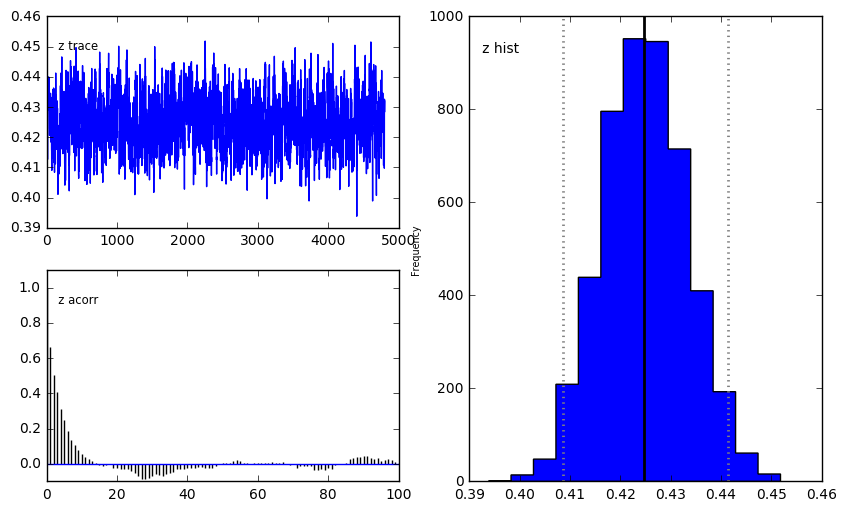

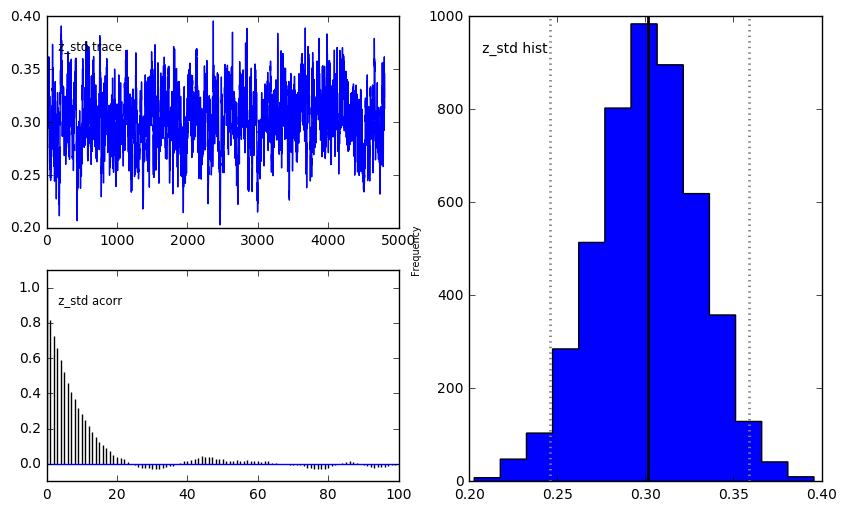

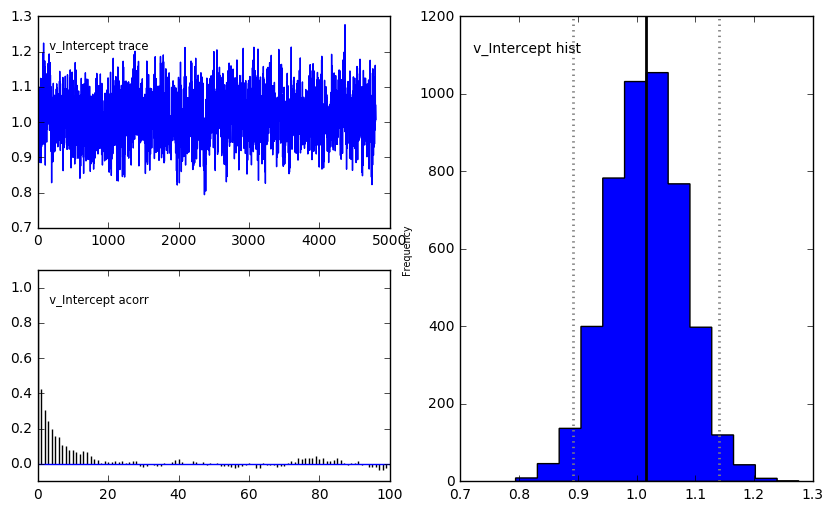

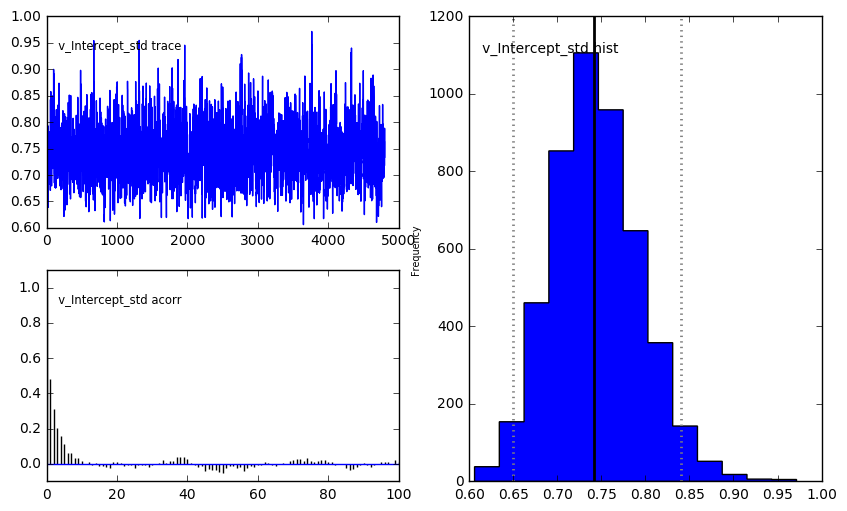

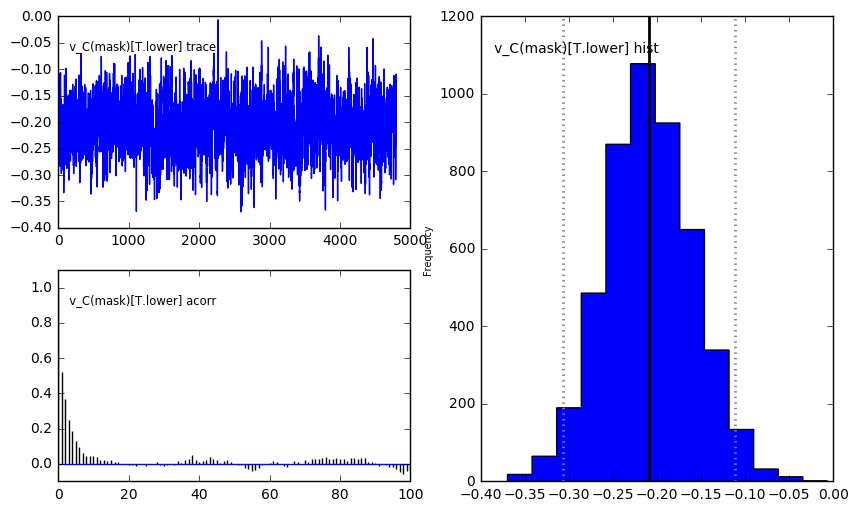

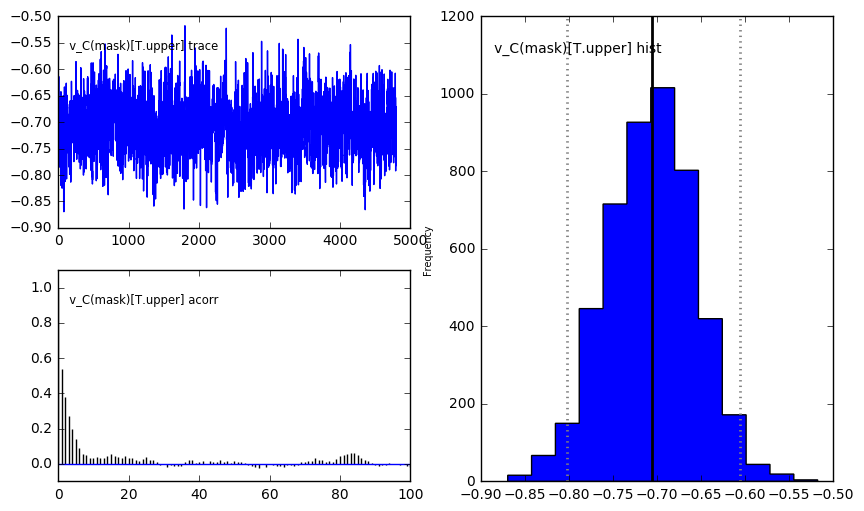

In [26]:
# run model
m_ff1.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ff1.print_stats()
m_ff1.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std       2.5q       25q  \
a                                    1.72977  0.0384987    1.65519   1.70418   
a_std                               0.521662  0.0327367   0.461195   0.49918   
a_subj.02hcv424u29nd5w               2.32235   0.335043    1.75669    2.0858   
a_subj.02k2uwlhgxnumn9               1.73928    0.23314    1.34769   1.57113   
a_subj.03g7h2hzq4o3g26               2.56917   0.256609     2.1168   2.38824   
a_subj.0nmr75cysk1ae0e               2.25322   0.256003    1.79904   2.07621   
a_subj.0t8qp67pqkw36cb                1.7293   0.187497    1.40136   1.59907   
a_subj.0vfpn4uf3t031qu               1.24157   0.153059   0.974252   1.13674   
a_subj.11dsfdtym1yy5mx               1.83885   0.217831    1.46505   1.68547   
a_subj.1d3dadyu4ekqb4q               1.46621   0.241788    1.07182   1.29316   
a_subj.1mt2emp4645cbl1               2.05889   0.390088    1.45799   1.78568   
a_subj.1rst24mbtgy9rc8               1.5

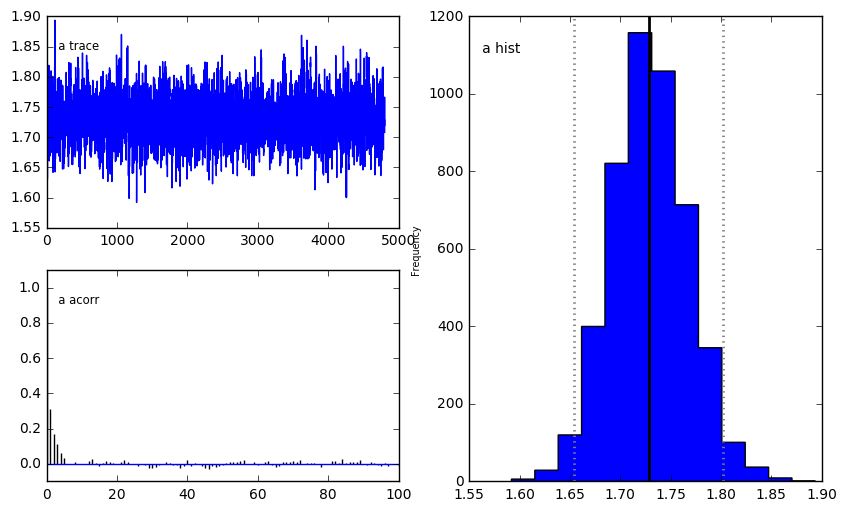

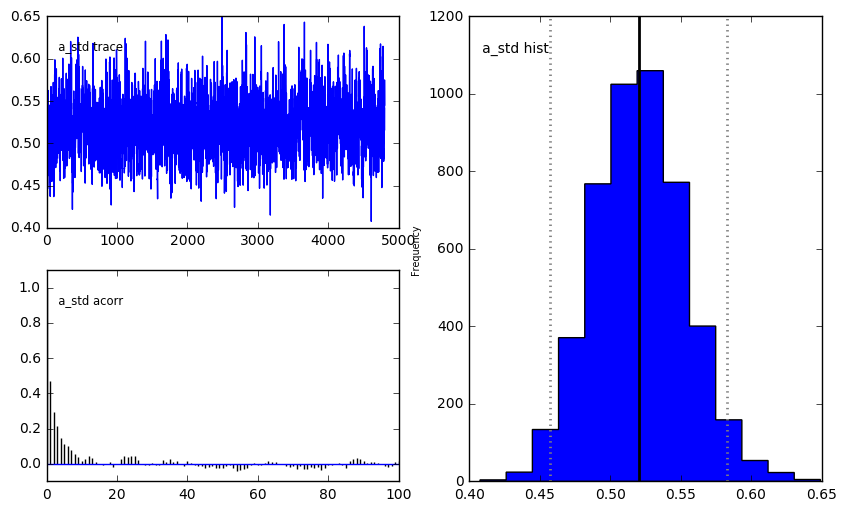

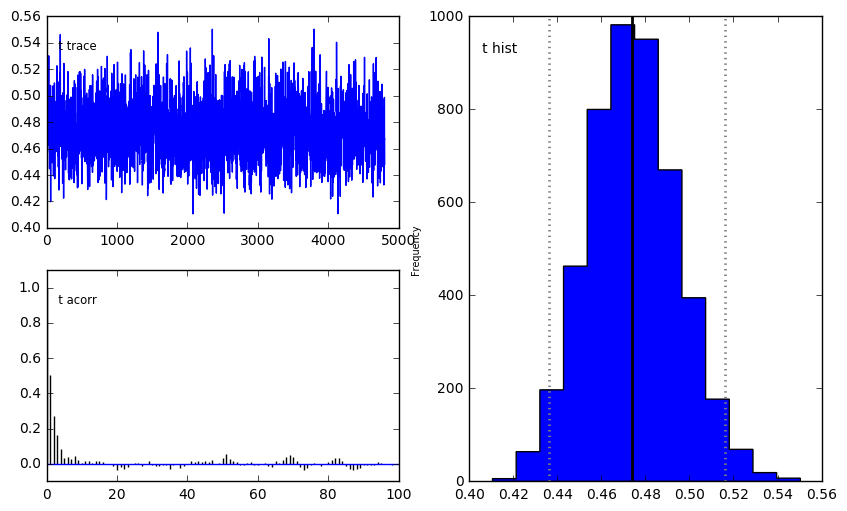

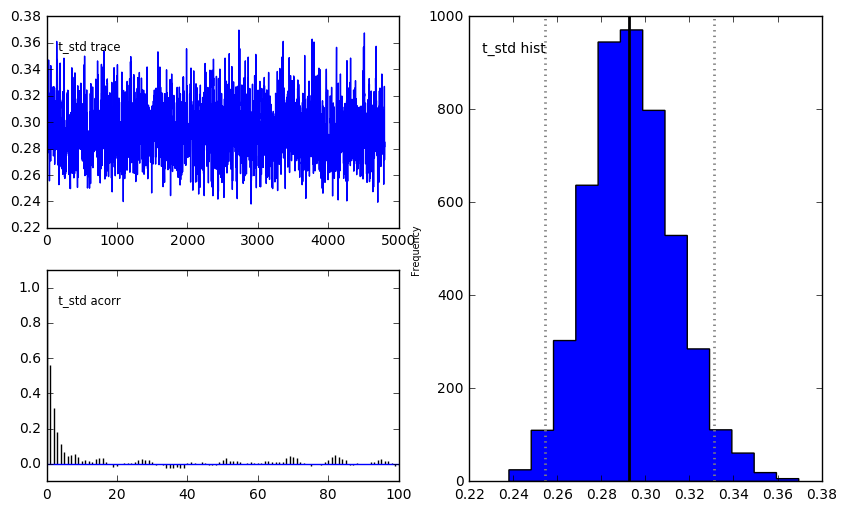

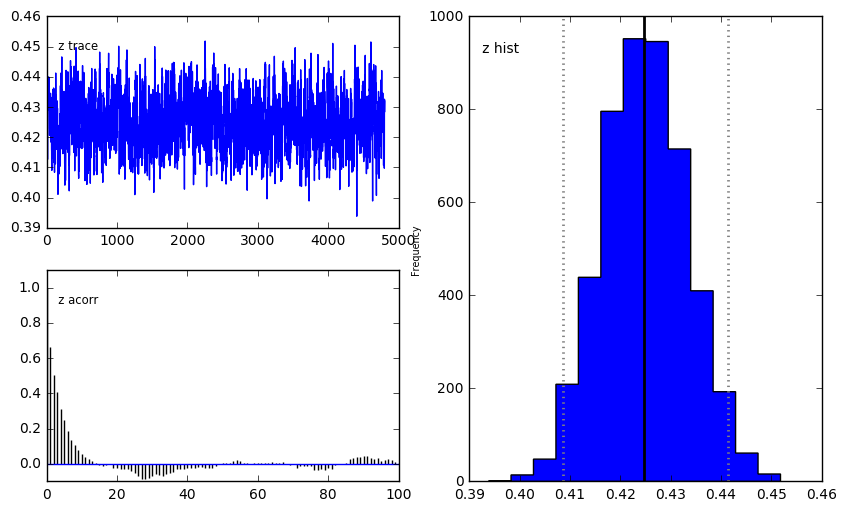

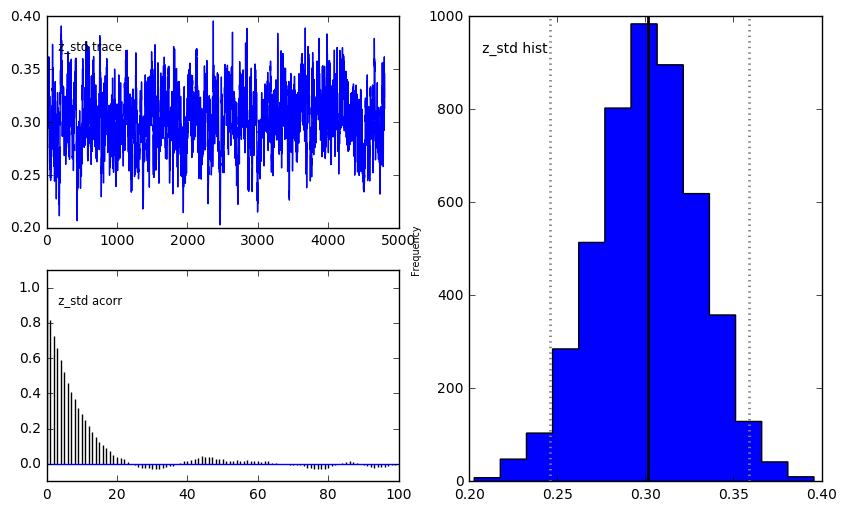

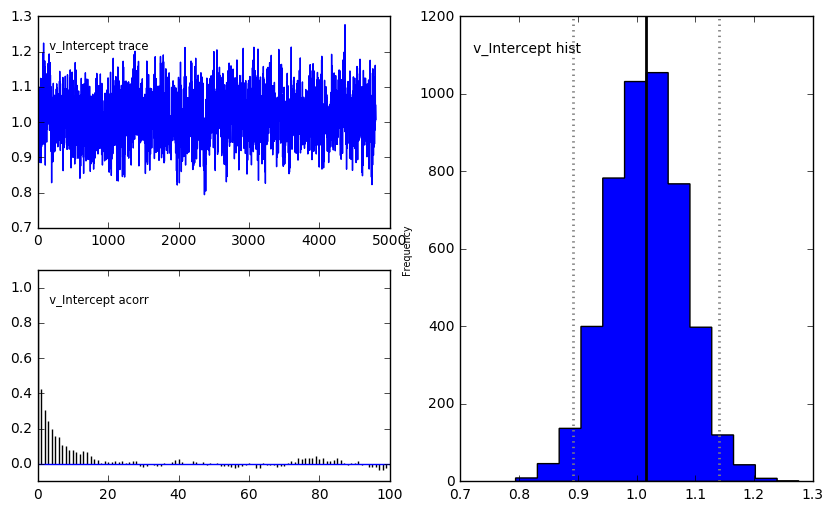

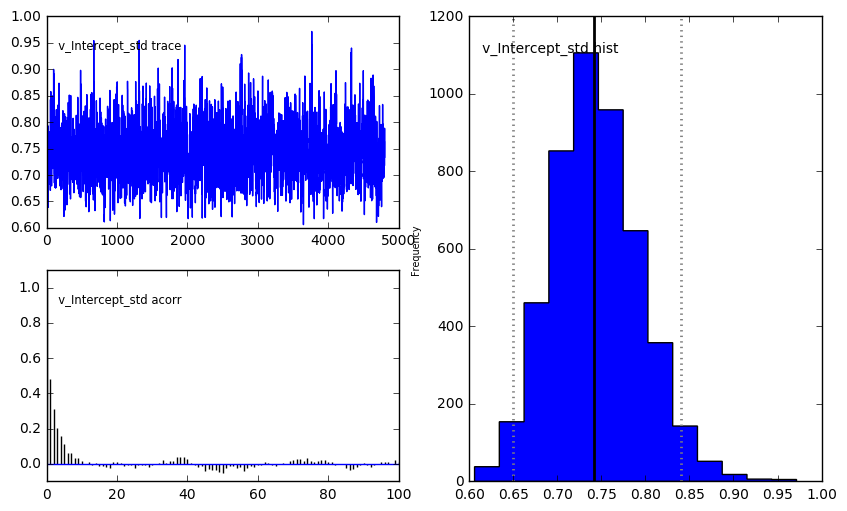

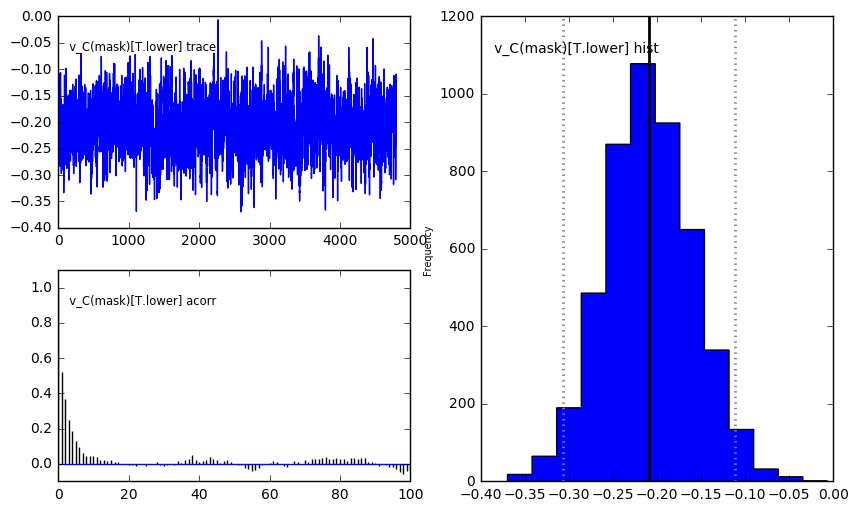

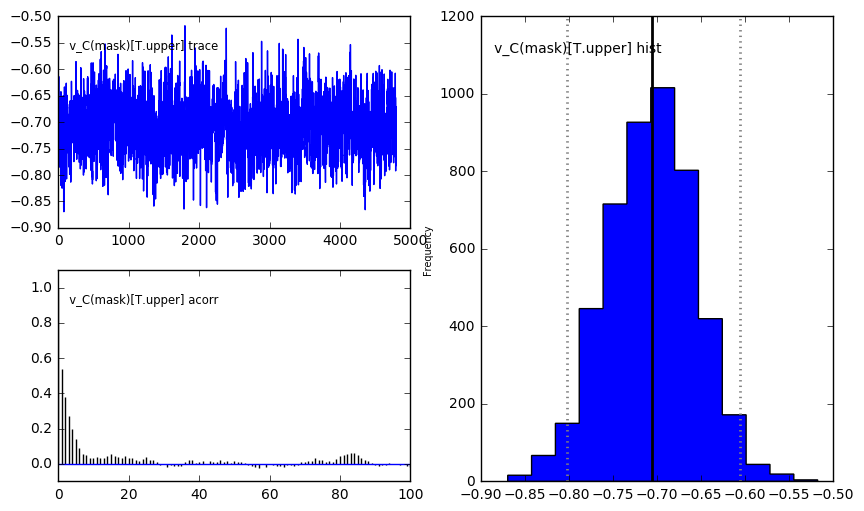

In [27]:
# save model stats
ff1_stats = m_ff1.gen_stats()
print(ff1_stats)
ff1_stats.to_csv('ff1_5000/faceMask_hddm_drift_maskFalseNegatives_ff1_5000.csv', index=True)

# save model posterior plots
m_ff1.plot_posteriors(path='ff1_5000/_posteriors', save=True)

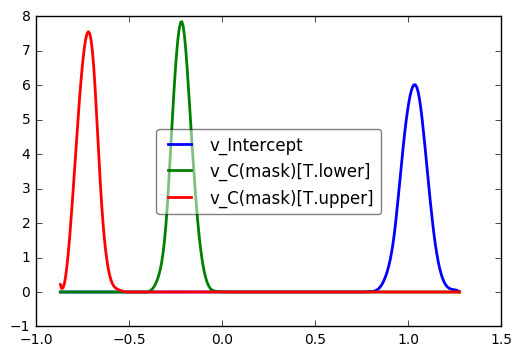

In [28]:
# plot model posteriors by mask
ff1_v_none, ff1_v_lower, ff1_v_upper = m_ff1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ff1_v_none, ff1_v_lower, ff1_v_upper])
plt.savefig('ff1_5000/faceMask_hddm_drift_maskFalsePositives_ff1_5000_v_mask.pdf')

In [29]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ff1_v_none > 0) = ", (ff1_v_none.trace() > 0).mean())
print("P(ff1_v_lower < 0) = ", (ff1_v_lower.trace() < 0).mean())
print("P(ff1_v_upper > 0) = ", (ff1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ff1_v_lower < ff1_v_upper) = ", (ff1_v_lower.trace() < ff1_v_upper.trace()).mean())

P(ff1_v_none > 0) =  1.0
P(ff1_v_lower < 0) =  1.0
P(ff1_v_upper > 0) =  0.0
P(ff1_v_lower < ff1_v_upper) =  0.0


In [12]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


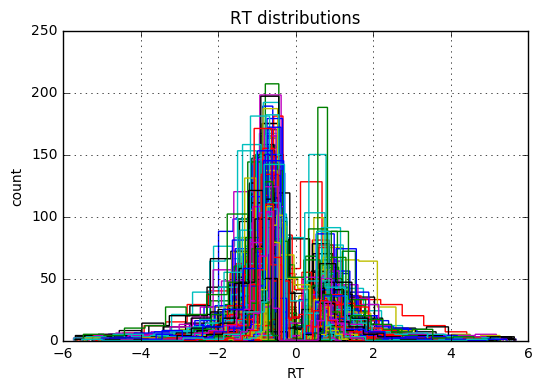

In [13]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [14]:
# subset dataset by emotion rating type (fearful) and facial expression (angry)
ff2_data = data2.loc[(data2['emotionRating'] == 'fearful') & (data2['expression'] == 'fearful')]
ff2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
57,lbmmswtrr0mpvov,1,4,fearful,57,_faces/HF09_F_X.jpg,HF09_F_X,HF09,H,F,fearful,baseline,1,1.147445,0,0,100,0,0,0
64,lbmmswtrr0mpvov,1,4,fearful,64,_faces/WM13_F_U.jpg,WM13_F_U,WM13,W,M,fearful,upper,1,1.012920,0,0,50,0,0,0
70,lbmmswtrr0mpvov,1,4,fearful,70,_faces/BF10_F_L.jpg,BF10_F_L,BF10,B,F,fearful,lower,1,0.669780,0,0,50,0,0,0
74,lbmmswtrr0mpvov,1,4,fearful,74,_faces/BF10_F_X.jpg,BF10_F_X,BF10,B,F,fearful,baseline,1,0.827940,0,0,100,0,0,0
92,lbmmswtrr0mpvov,1,4,fearful,92,_faces/BF10_F_U.jpg,BF10_F_U,BF10,B,F,fearful,upper,0,-2.819985,0,0,50,0,0,0
95,lbmmswtrr0mpvov,1,4,fearful,95,_faces/HF09_F_L.jpg,HF09_F_L,HF09,H,F,fearful,lower,1,0.810080,0,0,50,0,0,0
102,lbmmswtrr0mpvov,1,4,fearful,102,_faces/WM13_F_L.jpg,WM13_F_L,WM13,W,M,fearful,lower,1,0.923765,0,0,50,0,0,0
103,lbmmswtrr0mpvov,1,4,fearful,103,_faces/HF09_F_U.jpg,HF09_F_U,HF09,H,F,fearful,upper,1,1.085630,0,0,50,0,0,0
106,lbmmswtrr0mpvov,1,4,fearful,106,_faces/WM13_F_X.jpg,WM13_F_X,WM13,W,M,fearful,baseline,1,0.700685,0,0,100,0,0,0
333,mr81dhy9r5lxu8r,0,4,fearful,10,_faces/BF10_F_L.jpg,BF10_F_L,BF10,B,F,fearful,lower,1,1.404000,0,0,50,0,0,0


In [15]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ff2_data = ff2_data[(ff2_data.subj_idx != 'me8doxrmo9vj9dx') & (ff2_data.subj_idx != 'n4v0blzwqwgrcpn') & (ff2_data.subj_idx != 'xs5439nm2v85thb')]

In [16]:
# define model
m_ff2 = hddm.HDDMRegressor(ff2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 41183.5 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std        2.5q        25q         50q        75q      97.5q       mc err
a                                    1.57041   0.0324944      1.5093    1.54832     1.56963     1.5917    1.63548   0.00108689
a_std                               0.394333   0.0298488    0.337512   0.374553    0.394145   0.414327   0.453413   0.00118004
a_subj.09coqg8hlpux6fe               1.39557    0.270105    0.941741    1.20277     1.36759    1.56166    1.99072   0.00621757
a_subj.0b3t2skj9mlhbkn               1.64559    0.268202     1.18067    1.46098     1.62477    1.80693    2.23185   0.00656594
a_subj.0bcg7mtj2n1jjw9               2.51249    0.389402     1.82899    2.23774     2.48519    2.76473    3.34397    0.0084621
a_subj.0s53r30oouek89b               2.20899    0.321356     1.65231    1.97606     2.18666    2.40673    2.90924   0.00633961
a_subj.0uj9gbhag3o1w1v               1.86601    0.276486     1.39122    1.66301     1.84404    2.03819    2.470

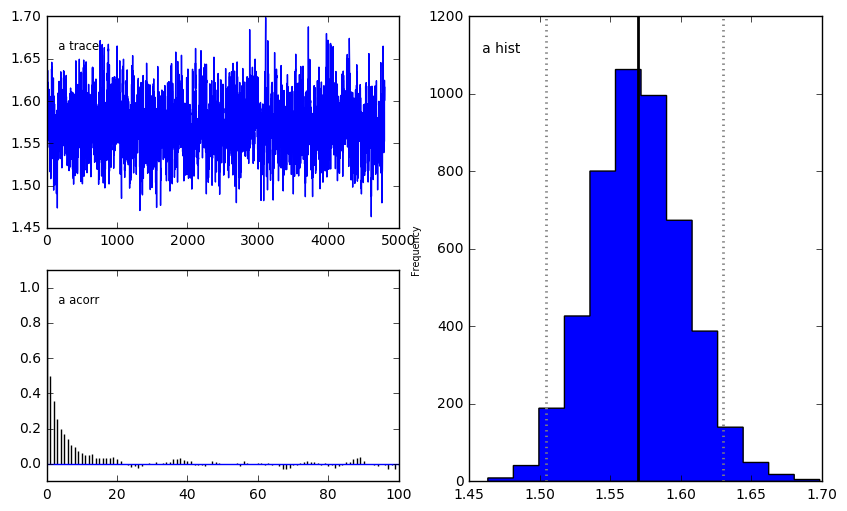

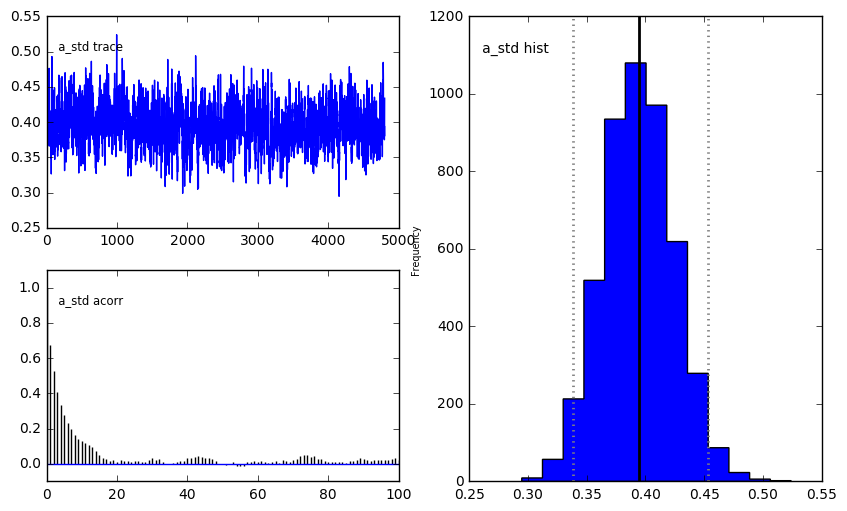

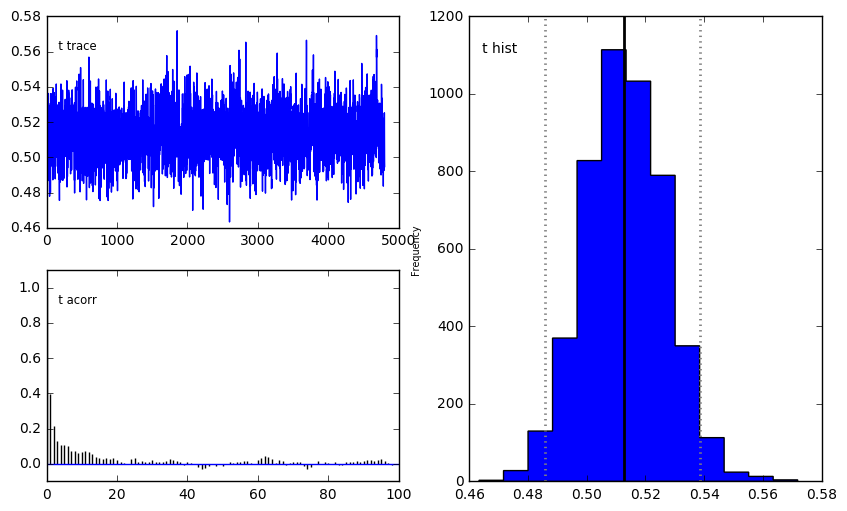

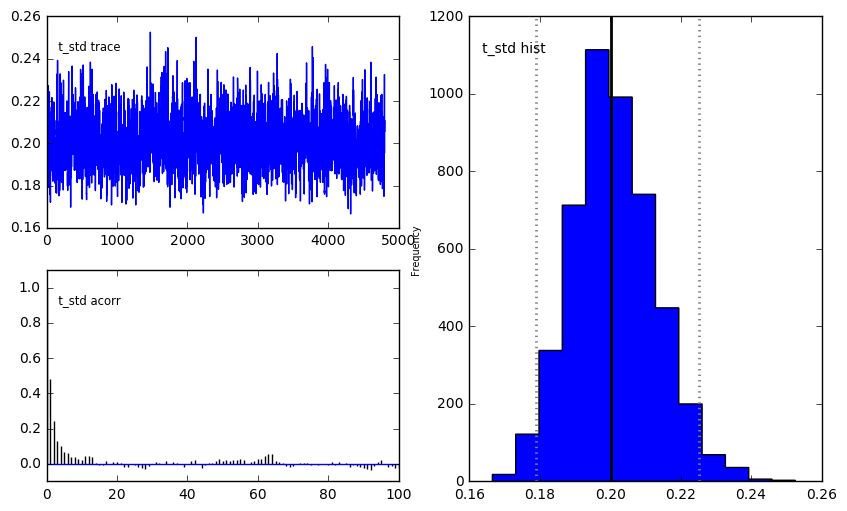

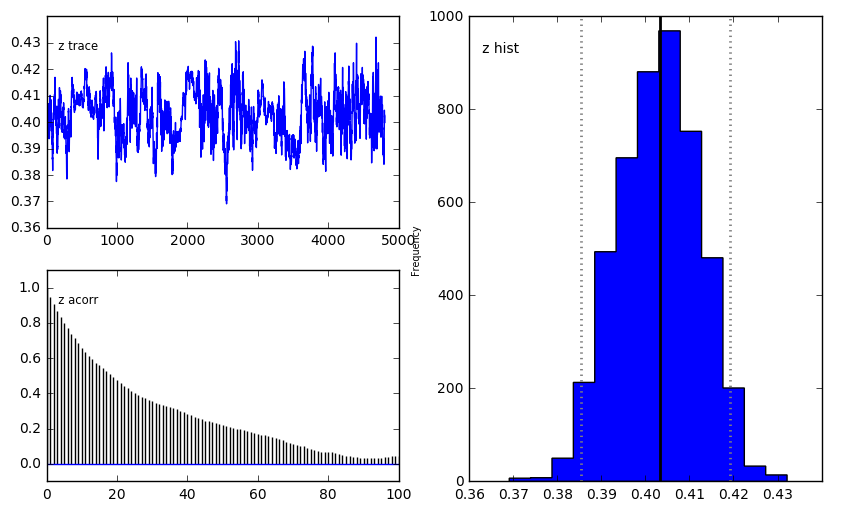

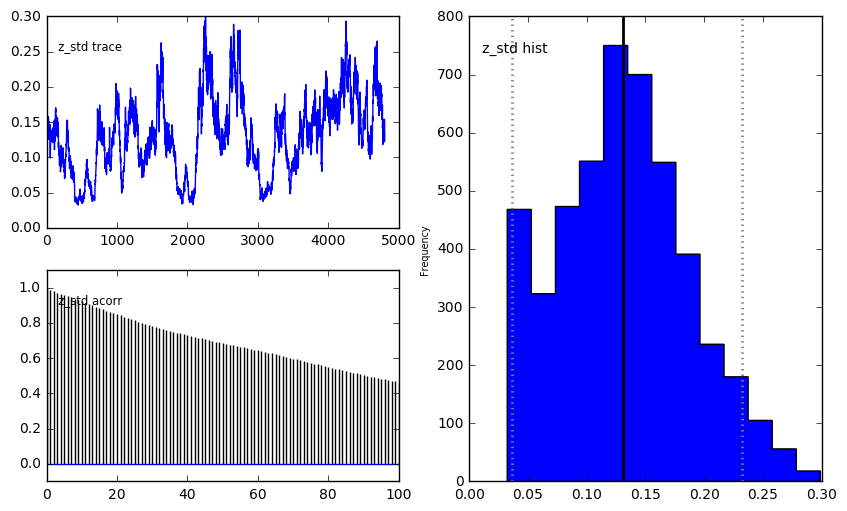

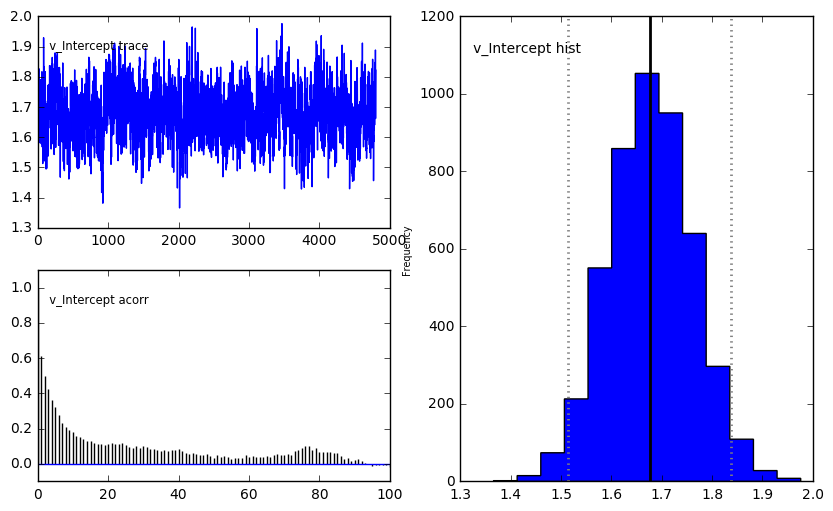

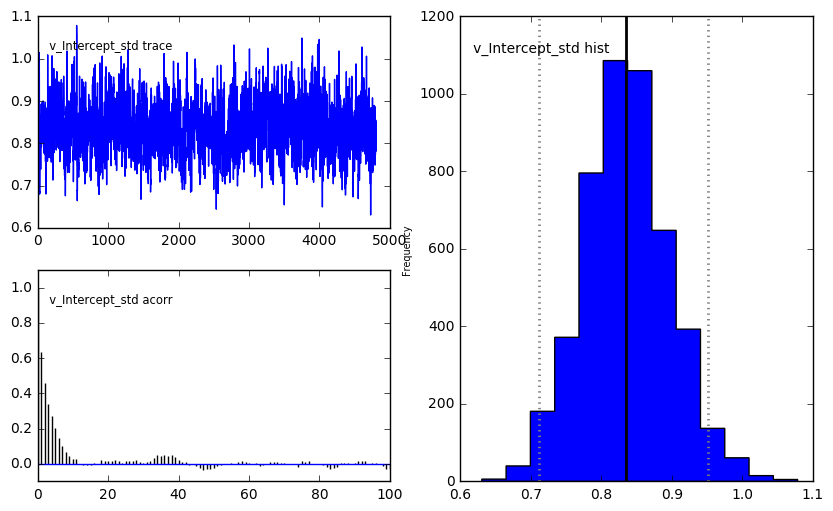

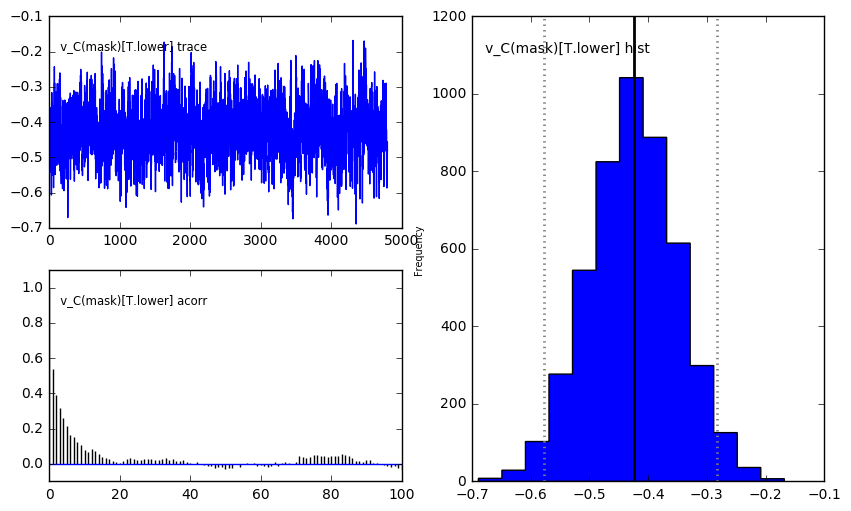

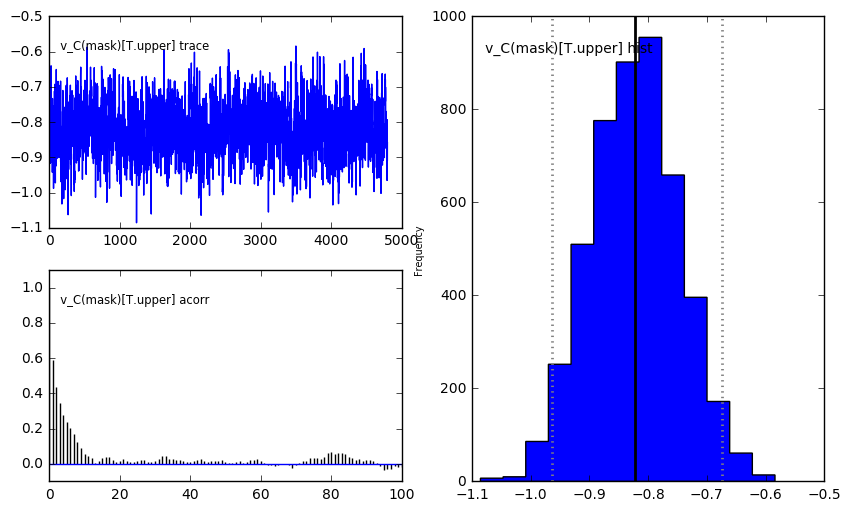

In [17]:
# run model
m_ff2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ff2.print_stats()
m_ff2.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std      2.5q       25q  \
a                                    1.57041  0.0324944    1.5093   1.54832   
a_std                               0.394333  0.0298488  0.337512  0.374553   
a_subj.09coqg8hlpux6fe               1.39557   0.270105  0.941741   1.20277   
a_subj.0b3t2skj9mlhbkn               1.64559   0.268202   1.18067   1.46098   
a_subj.0bcg7mtj2n1jjw9               2.51249   0.389402   1.82899   2.23774   
a_subj.0s53r30oouek89b               2.20899   0.321356   1.65231   1.97606   
a_subj.0uj9gbhag3o1w1v               1.86601   0.276486   1.39122   1.66301   
a_subj.17nzn4k8r1qkmrn                1.6096   0.245079   1.19908   1.43109   
a_subj.1fdkw2qjx3hc3lk               1.58515   0.223615   1.20123   1.42787   
a_subj.1mla0dmotqefnav                1.5479   0.222439   1.16626   1.38717   
a_subj.23hr9tl84h3zhw3               1.43477    0.20518   1.07771   1.28996   
a_subj.27muqwvalwne26r               1.64634   0.225

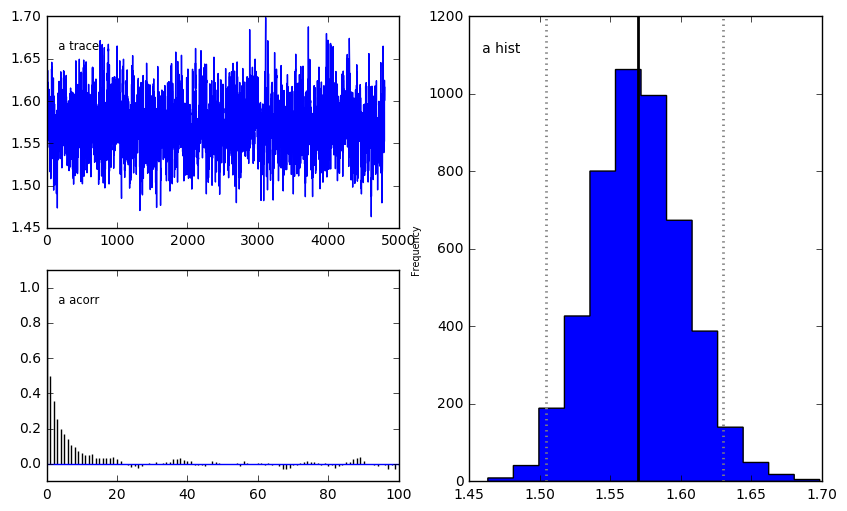

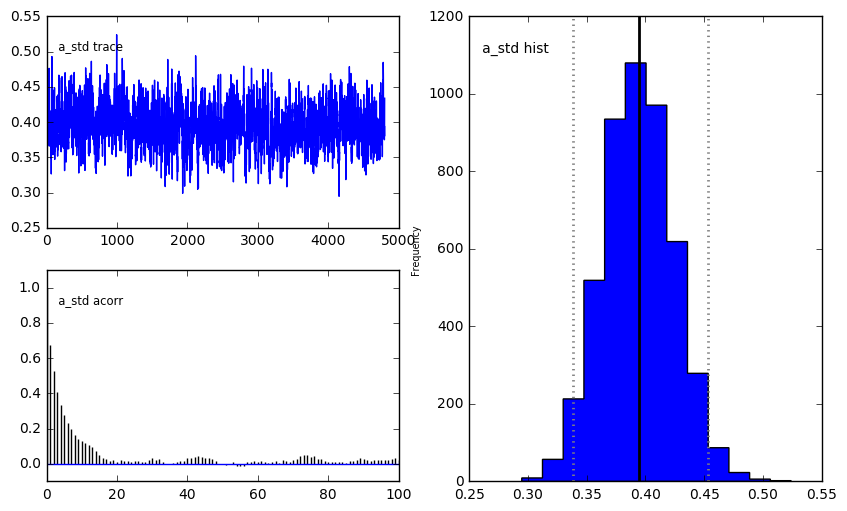

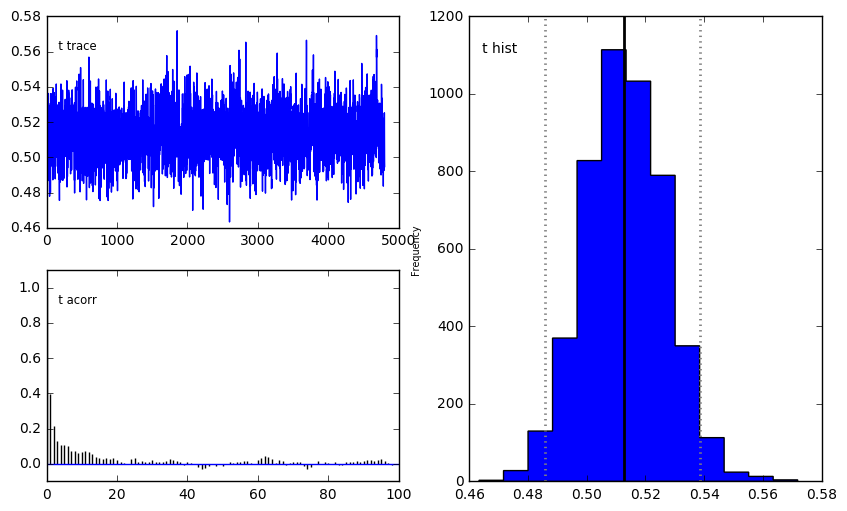

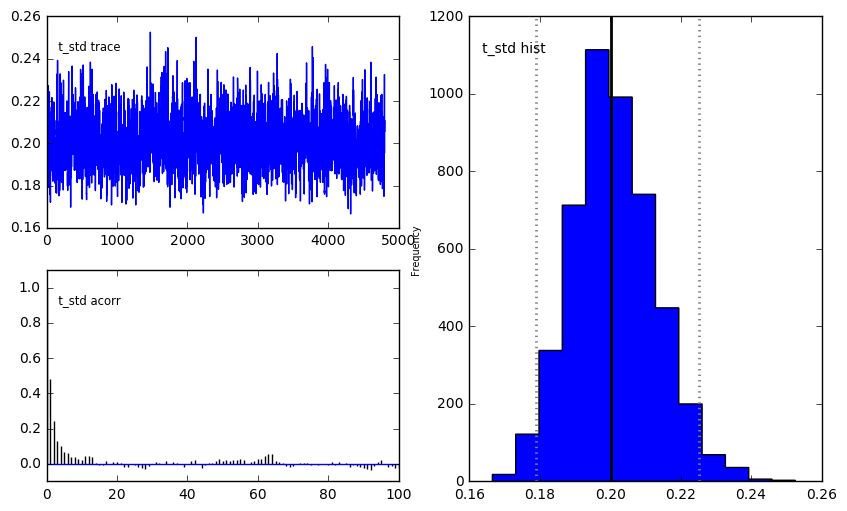

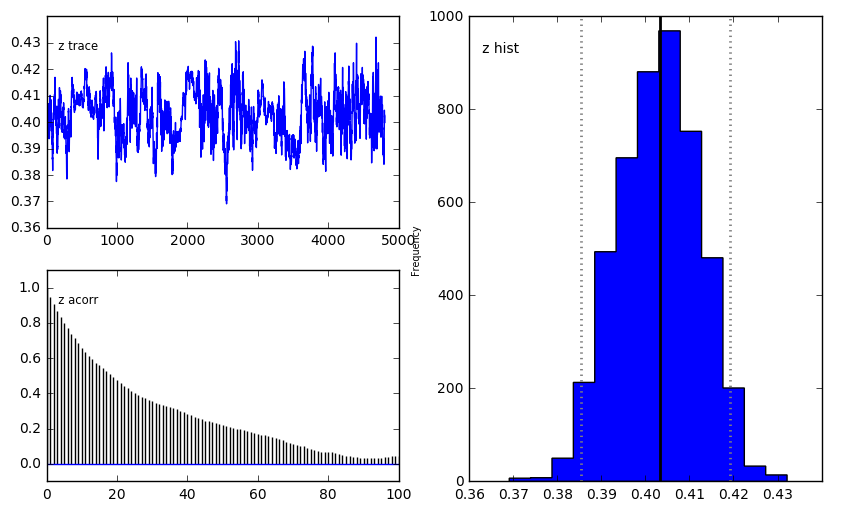

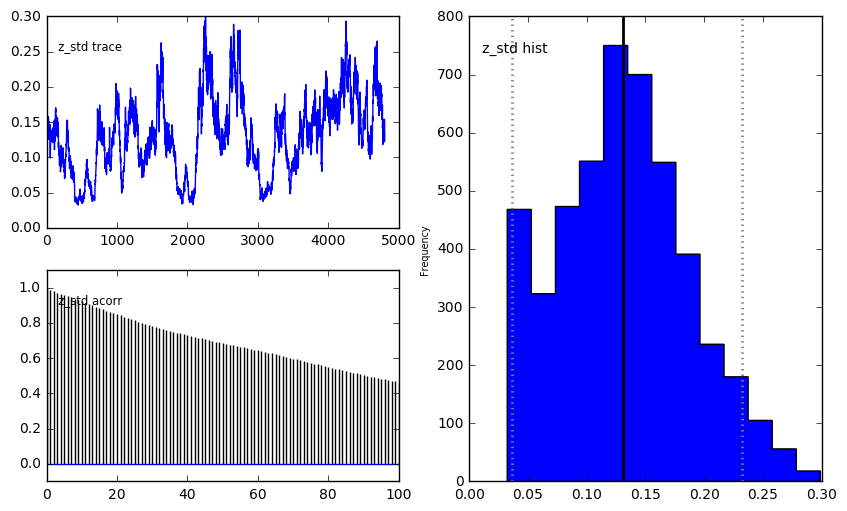

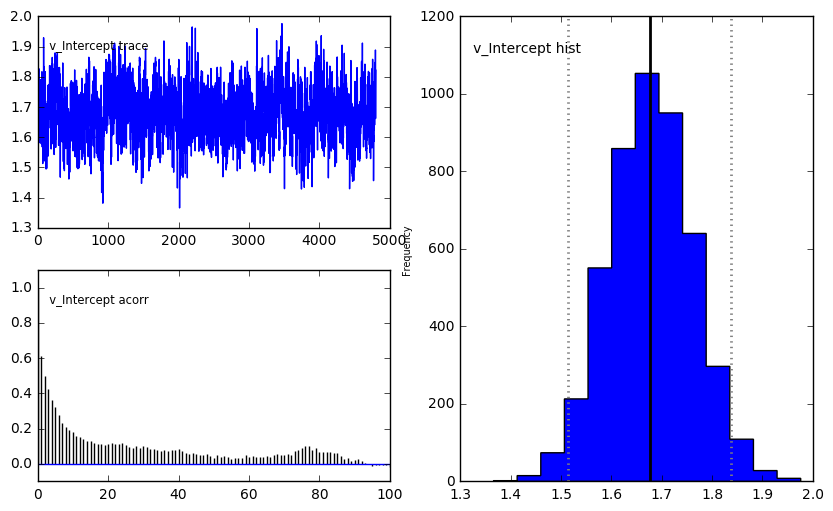

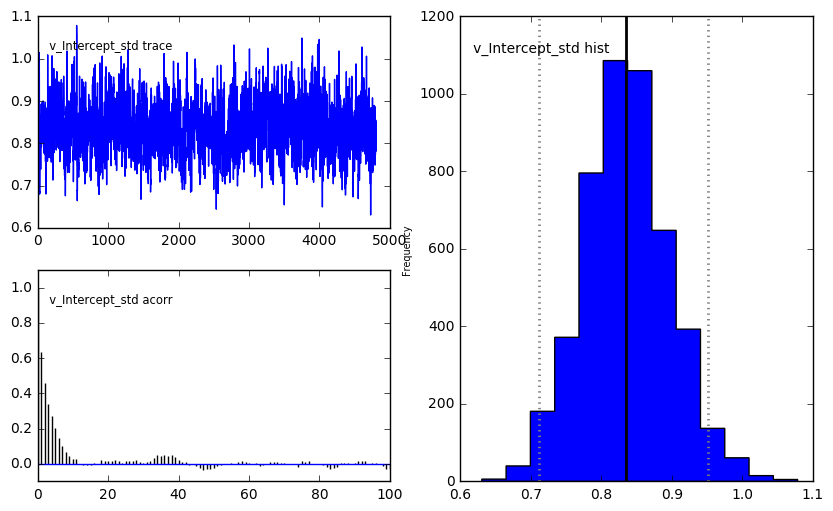

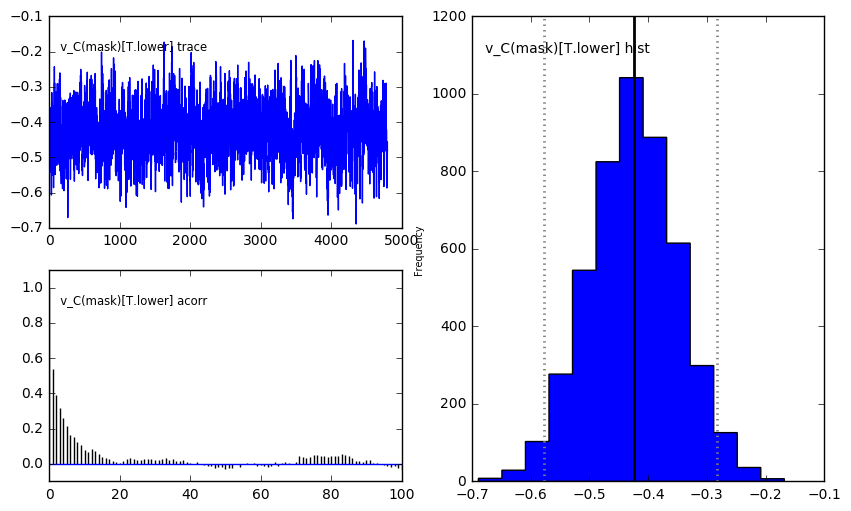

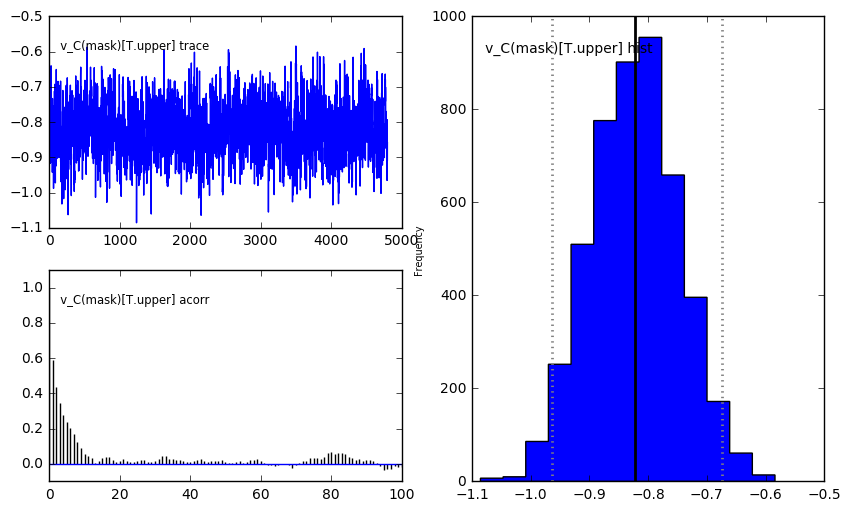

In [18]:
# save model stats
ff2_stats = m_ff2.gen_stats()
print(ff2_stats)
ff2_stats.to_csv('ff2_5000/faceMask2_hddm_drift_maskFalseNegatives_ff2_5000.csv', index=True)

# save model posterior plots
m_ff2.plot_posteriors(path='ff2_5000/_posteriors', save=True)

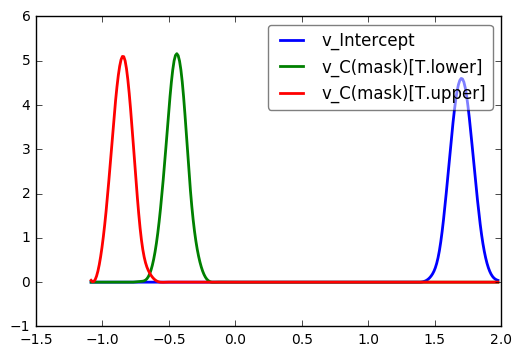

In [19]:
# plot model posteriors by mask
ff2_v_none, ff2_v_lower, ff2_v_upper = m_ff2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ff2_v_none, ff2_v_lower, ff2_v_upper])
plt.savefig('ff2_5000/faceMask2_hddm_drift_maskFalsePositives_ff2_5000_v_mask.pdf')

In [35]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ff2_v_none < 0) = ", (ff2_v_none.trace() < 0).mean())
print("P(ff2_v_lower > 0) = ", (ff2_v_lower.trace() > 0).mean())
print("P(ff2_v_upper > 0) = ", (ff2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ff2_v_lower < ff2_v_upper) = ", (ff2_v_lower.trace() < ff2_v_upper.trace()).mean())

P(ff2_v_none < 0) =  0.0
P(ff2_v_lower > 0) =  0.0
P(ff2_v_upper > 0) =  0.0
P(ff2_v_lower < ff2_v_upper) =  0.0


In [36]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ff1_v_none > ff2_v_none) = ", ((ff1_v_none.trace() > ff2_v_none.trace()).mean()))
print("P(ff1_v_lower < ff2_v_lower) = ", ((ff1_v_lower.trace() < ff2_v_lower.trace()).mean()))
print("P(ff1_v_upper < ff2_v_upper) = ", ((ff1_v_upper.trace() < ff2_v_upper.trace()).mean()))


P(ff1_v_none > ff2_v_none) =  0.0
P(ff1_v_lower < ff2_v_lower) =  0.0075
P(ff1_v_upper < ff2_v_upper) =  0.1025


In [32]:
## adding together the relative values:
ff1_v_none_plus_lower = ff1_v_none.trace() + ff1_v_lower.trace()
ff1_v_none_plus_upper = ff1_v_none.trace() + ff1_v_upper.trace()
ff2_v_none_plus_lower = ff2_v_none.trace() + ff2_v_lower.trace()
ff2_v_none_plus_upper = ff2_v_none.trace() + ff2_v_upper.trace()

In [34]:
print("P(ff1_v_none_plus_lower > ff2_v_none_plus_lower) = ", (ff1_v_none_plus_lower > ff2_v_none_plus_lower).mean())
print("P(ff1_v_none_plus_upper > ff2_v_none_plus_upper) = ", (ff1_v_none_plus_upper > ff2_v_none_plus_upper).mean())

P(ff1_v_none_plus_lower > ff2_v_none_plus_lower) =  0.0
P(ff1_v_none_plus_upper > ff2_v_none_plus_upper) =  0.0
